In [1]:
import scipy
from scipy import misc
import glob
from PIL import Image
import matplotlib.pyplot as plt

from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

Using TensorFlow backend.
/home/student/.local/lib/python3.6/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


/home/student/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


Bach_Viola_Concerto_PROCESSED.wav


/home/student/.local/lib/python3.6/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


Viola Concerto in G Major-1st Mov_PROCESSED.wav
[Iris Hur] Handel-Casadesus Viola Concerto 1st Movement_PROCESSED.wav
[Yoonah Park] Bach Viola Concerto in C minor 3rd movement_PROCESSED.wav
Sonata No. 3 in F Major I Adagio _processed.wav
[Yoonah Park] Bach Viola Concerto in C Minor 1st Movement_PROCESSED.wav
Viola Da Gamba_PROCESSED_PROCESSED.wav
Minuet No 3_PROCESSED.wav
Minuet No 1_PROCESSED.wav
Viola Concerto in G Major-4th Mov_PROCESSED.wav
Sonata No. 3 in F MajorÂ III LargoPROCESSED.wav
Viola Concerto in G Major-2nd Mov_PROCESSED.wav
Vivaldi - Sonata for Viola and Piano in B flat_PROCESSED.wav
Vivaldi sonata in a minor (viola arr_PROCESSED.wav
Sonata in B minor, BWV 1014 II - Allegro_PROCESSED.wav
Vivaldi Violin Concerto in E_PROCESSED.wav
Sonata in B minor, BWV 1014 IV -Allegro_PROCESSED.wav
Sonata in G BWV 1019I - Allegro_PROCESSED.wav
Sonata in C minor H 514 I -Allegro moderato_PROCESSED.wav
Sonata in G BWV 1019 II -Largo_PROCESSED.wav


/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Sonata in C minor H 514 II -Adagio ma non troppo_PROCESSED.wav
Sonata in G  BWV 1019 IV Adagio_PROCESSED.wav
Vivaldi_s Winter, Movement 1 (with piano)_PROCESSED.wav
Vivaldi Concerto in G Major for Violin and Piano, Mvt 1_PROCESSED.wav
Canon in D (Pachelbel) - Violin _ Piano_PROCESSED.wav
Sonata in A, BWV 1015 IV -Presto_PROCESSED.wav
Sonata in B minor, BWV 1014 III -Andante_PROCESSED.wav
Sonata in A, BWV 1015 II - Allegro assai_PROCESSED.wav


<Figure size 432x288 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

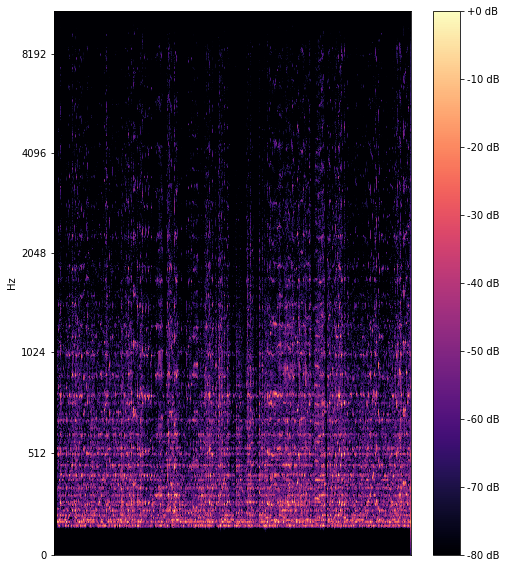

In [2]:
import os
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import numpy as np
import math
os.chdir('/home/student/Downloads/new_violin_viola/baroque/viola/combined_train')
x1=[]
y_train=[]
mfcc_list_mean = []
mfcc_list_std = []

freqViolin = []
freqViola = []
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/baroque/viola/combined_train'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        #temp = x/x.max()  #normalization
        #S = librosa.feature.melspectrogram(temp, sr=sr, n_mels=128)  # 128 mel bands
        #mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=13)
        #tempList = list(np.mean(mfcc,1))
        #tempList1 = list(np.std(mfcc,1))
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/baroque/train_combined/viola/{f_name[:-4]}.png')
        
        
os.chdir('/home/student/Downloads/new_violin_viola/baroque/violin/combined_train')  
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/baroque/violin/combined_train'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/baroque/train_combined/violin/{f_name[:-4]}.png')



Vivaldi Sonata No.5 in E Minor, Allegro, for Viola and Piano_PROCESSED.wav
Sonata No. 3 in F Major II Allegro_PROCESSED.wav
Viola Concerto in G Major-3rd Mov_PROCESSED.wav
Air Suite, Viola _ Piano_PROCESSED.wav
Sonata No. 3 in F Major IV Allegro _PROCESSED.wav
Viola Da Gamba_PROCESSED.wav
Sonata in C minor, H 514 III -Presto_PROCESSED.wav
Sonata in G, BWV 1019 V -Allegro_PROCESSED.wav
Sonata in A, BWV 1015 III -Andante un poco_PROCESSED.wav
Sonata in A, BWV 1015-Dolce_PROCESSED.wav
Vivaldi - Violin Concerto in G minor, RV315 Summer , III_PROCESSED.wav
Sonata in B minor, BWV 1014-Adagio_PROCESSED.wav


<Figure size 432x288 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

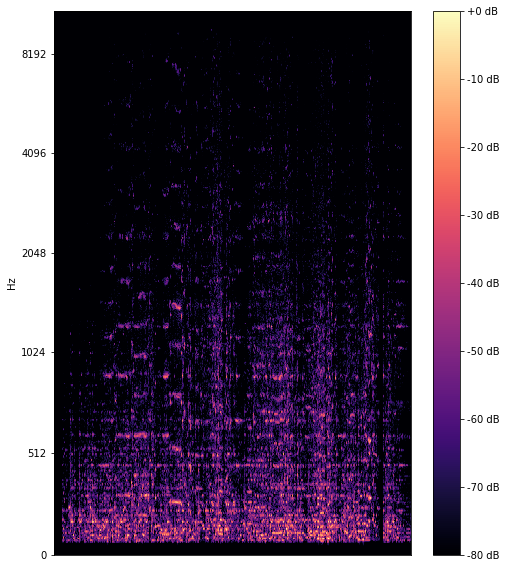

In [3]:
os.chdir('/home/student/Downloads/new_violin_viola/baroque/viola/combined_test')
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/baroque/viola/combined_test'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        #temp = x/x.max()  #normalization
        #S = librosa.feature.melspectrogram(temp, sr=sr, n_mels=128)  # 128 mel bands
        #mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=13)
        #tempList = list(np.mean(mfcc,1))
        #tempList1 = list(np.std(mfcc,1))
       
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/baroque/test_combined/viola/{f_name[:-4]}.png')
        
        
os.chdir('/home/student/Downloads/new_violin_viola/baroque/violin/combined_test')  
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/baroque/violin/combined_test'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/baroque/test_combined/violin/{f_name[:-4]}.png')


    

In [2]:
train_dir = "/home/student/Downloads/new_violin_viola_dl/baroque/train_combined/"
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator =train_data.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=2,subset='training')


validation_generator=train_data.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=2,subset='validation')

testing_dir = "/home/student/Downloads/new_violin_viola_dl/baroque/test_combined/"
testing_data = ImageDataGenerator(rescale=1./255)
testing_generator = testing_data.flow_from_directory(testing_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=2)


Found 24 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [3]:
def GenreModel(input_shape = (288,432,4),classes=2):
  
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(128,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)
  
  

  X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [6]:
import keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

  
model = GenreModel(input_shape=(288,432,4),classes=2)
opt = Adam(learning_rate=0.0015)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy', 'mae']) 

history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
12/12 [==============================] - 1s 94ms/step - loss: 6.5166 - accuracy: 0.6250 - mae: 0.3743 - val_loss: 0.9949 - val_accuracy: 0.5000 - val_mae: 0.4867
Epoch 2/30
12/12 [==============================] - 0s 20ms/step - loss: 4.9657 - accuracy: 0.5833 - mae: 0.3980 - val_loss: 6.1248 - val_accuracy: 0.5000 - val_mae: 0.4995
Epoch 3/30
12/12 [==============================] - 0s 23ms/step - loss: 4.1857 - accuracy: 0.4583 - mae: 0.5292 - val_loss: 0.0470 - val_accuracy: 0.5000 - val_mae: 0.4813
Epoch 4/30
12/12 [==============================] - 0s 25ms/step - loss: 0.7552 - accuracy: 0.6667 - mae: 0.4093 - val_loss: 1.1733 - val_accuracy: 0.5000 - val_mae: 0.5075
Epoch 5/30
12/12 [==============================] - 0s 24ms/step - loss: 1.3123 - accuracy: 0.5000 - mae: 0.4693 - val_loss: 0.0924 - val_accuracy: 0.5000 - val_mae: 0.5078
Epoch 6/30
12/12 [==============================] - 0s 24ms/step - loss: 0.6159 - accuracy: 0.7083 - mae: 0.3605 - val_loss: 1.6474 - v

In [7]:
model.evaluate(testing_generator)

6/6 [==============================] - 0s 22ms/step


[1.7047450542449951, 0.75, 0.3441251218318939]